<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment7/blob/main/assignment_7_Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize



In [ ]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.csv to EastWestAirlines (2).csv


In [ ]:
airline=pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
airline=airline.rename(columns={'ID#':'ID','Award?':'Award'})

In [ ]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# **Data Preprocessing**

In [ ]:
airline1=airline.drop(['ID','Award'], axis=1)
airline1.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

std_df=StandardScaler().fit_transform(airline1)
std_df.shape

(3999, 10)

**MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

minmax_df=minmax.fit_transform(airline1)
minmax_df.shape

(3999, 10)

# **PCA**

**Running PCA of standardized data**

In [ ]:
from sklearn.decomposition import PCA
pca_std=PCA(random_state=10, n_components=0.95)
pca_std_df=pca_std.fit_transform(std_df)

In [ ]:
print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [ ]:
print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [ ]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

**Running PCA of MinMaxscalar data**

In [ ]:
from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [ ]:
print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [ ]:
print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


# **KMeans Clustering**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# standardisation function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_airline1_df=scaler.fit_transform(airline1.iloc[:,1:])
scaled_airline1_df

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.39545434],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.37995704],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787,  1.41192021],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31560393],
       [-0.18629869, -0.76957841, -0.09824189, ...,  0.0285309 ,
        -0.09850333, -1.31608822],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.32860326,
        -0.36216787, -1.31754109]])

In [ ]:
# how to find optimum number of cluster
# the K-Means algorithm aimds to choose centroid that minimise the inertia, or within-cluster sum of square criterion:

In [ ]:
kmeans=KMeans(n_clusters=4,random_state=0)
predict=kmeans.fit_predict(scaled_airline1_df)
predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(scaled_airline1_df)

KMeans(n_clusters=2, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[ 0.07954973,  1.17776208, -0.05226717,  0.12266406,  1.009609  ,
         0.93770702,  0.29259956,  0.32920589,  0.39108988],
       [-0.03946238, -0.58425459,  0.02592827, -0.06085019, -0.50083858,
        -0.46517004, -0.1451504 , -0.16330977, -0.19400867]])

In [ ]:
kmeans.inertia_

28736.674262878772

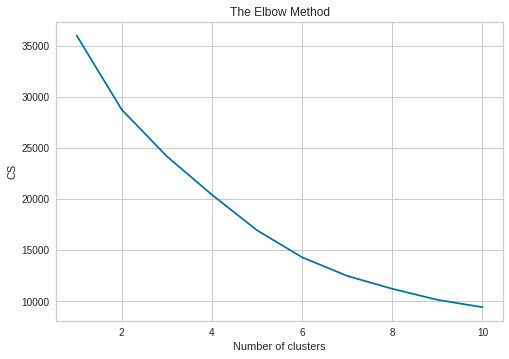

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_airline1_df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [ ]:
#selecting 4 clusters from above screen plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
scaled_airline1_df=pd.Series(model.labels_)
airline2['Clust']=scaled_airline1_df

In [ ]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,3,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [ ]:
airline2.iloc[:,1:5].groupby(airline2.Clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles
Clust,,,,
0,89.978318,1.089900,1.017980,1.004231
1,198.336634,3.915842,1.001238,1.025990
2,80.437002,3.561404,1.001595,1.022329
3,290.453195,1.156018,1.032689,1.008915


# **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# normalize heterogeneous numerical data using standard scalar fit transform to dataset
airline2_norm=StandardScaler().fit_transform(airline2)
airline2_norm

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.94215353e-01, -5.29848326e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.94215353e-01, -5.29848326e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.94215353e-01, -5.29848326e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.79675714e-02,  2.02056149e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.94215353e-01, -5.29848326e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -8.94215353e-01, -5.29848326e-01]])

In [ ]:
#DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline2_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
# Noisy samples are given the label -1
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# adding clusters to datasets
airline2['clusters']=dbscan.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,3,3
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [ ]:
airline2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,183589.643382,950.170956,2.751838,1.056985,1.090074,40318.612132,22.632353,2209.294118,6.387868,4786.455882,0.696691,1.634191
1,0,38448.846240,6.022447,1.090348,1.000000,1.000000,3002.340629,6.167789,147.612233,0.471942,3607.837823,0.000000,0.000000
2,1,72523.040336,3.510924,3.796639,1.000000,1.000000,37044.655462,17.299160,221.465546,0.653782,4785.737815,1.000000,1.000000
3,2,104303.603321,2.083026,3.525830,1.000000,1.000000,29004.763838,16.022140,103.745387,0.297048,4388.271218,0.000000,2.000000
4,3,48674.273092,17.381526,1.158635,1.000000,1.000000,6196.168675,7.493976,368.092369,1.224900,4190.558233,1.000000,3.000000
5,4,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000,0.000000
6,5,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000,0.000000
7,6,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000,1.000000
8,7,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000,3.000000


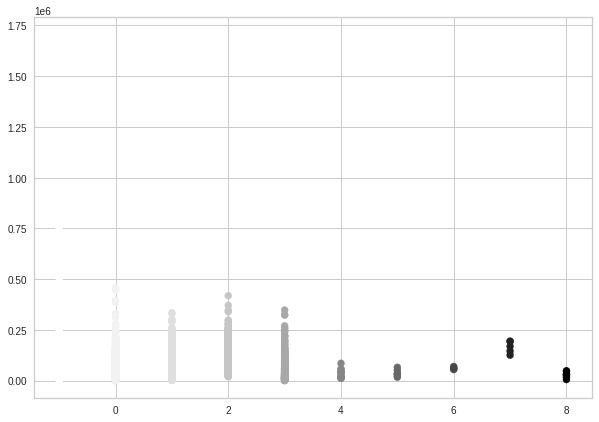

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))

plt.scatter(airline2['clusters'],airline2['Balance'], c=dbscan.labels_)